### Intialize a data pull from API

In [7]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'100',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'c89176d9-0da0-427a-8739-6dcd26298353',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e) 

{'status': {'timestamp': '2022-06-22T06:04:07.190Z', 'error_code': 0, 'error_message': None, 'elapsed': 21, 'credit_count': 1, 'notice': None, 'total_count': 9923}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9577, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [46]:
type(data)

dict

### Create a df from retrieved data and normalize JSON 

In [8]:
import pandas as pd 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
df1 = pd.json_normalize(data['data'])
df1

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,9577,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.907380e+07,1.907380e+07,NaN,1,NaN,NaN,NaN,2022-06-22T06:02:00.000Z,2.038948e+04,2.869088e+10,-6.6656,-0.243981,-2.426514,-3.955299,-32.640214,-48.486850,-52.585520,3.889048e+11,43.2302,4.281791e+11,NaN,2022-06-22T06:02:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,5767,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.212608e+08,1.212608e+08,NaN,2,NaN,NaN,NaN,2022-06-22T06:01:00.000Z,1.095910e+03,1.499623e+10,-21.6359,-0.330519,-4.528529,-2.611511,-46.254896,-62.908544,-64.021398,1.328910e+11,14.7654,1.328910e+11,NaN,2022-06-22T06:01:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,34965,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.698103e+10,6.861062e+10,NaN,3,NaN,NaN,NaN,2022-06-22T06:01:00.000Z,9.990053e-01,4.945055e+10,-6.1742,-0.000566,0.000101,0.034283,-0.015161,-0.126566,-0.137231,6.691440e+10,7.4340,6.854238e+10,NaN,2022-06-22T06:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,3408,USD Coin,USDC,usd-coin,4569,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.589795e+10,5.589795e+10,NaN,4,NaN,NaN,NaN,2022-06-22T06:00:00.000Z,1.000381e+00,4.665441e+09,-13.3469,-0.004567,-0.003963,0.014187,-0.007494,0.002195,0.044889,5.591924e+10,6.2109,5.591924e+10,NaN,2022-06-22T06:00:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
4,1839,BNB,BNB,bnb,972,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,NaN,2022-06-22T06:01:00.000Z,2.163730e+02,1.149527e+09,-7.3331,-0.125170,-2.629917,2.235202,-33.180799,-46.267109,-47.229299,3.532873e+10,3.9244,3.572681e+10,NaN,2022-06-22T06:01:00.000Z,NaN,NaN,NaN,NaN,NaN
5,4687,Binance USD,BUSD,binance-usd,3873,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.752575e+10,1.752575e+10,NaN,6,NaN,NaN,NaN,2022-06-22T06:01:00.000Z,1.001031e+00,4.912605e+09,-2.0591,0.139870,0.011006,0.160419,0.050775,-0.034380,-0.000098,1.754381e+10,1.9486,1.754381e+10,NaN,2022-06-22T06:01:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1
6,2010,Cardano,ADA,cardano,460,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.373903e+10,3.427770e+10,NaN,7,NaN,NaN,NaN,2022-06-22T06:00:00.000Z,4.701564e-01,9.913126e+08,-8.9484,0.100000,-5.388912,1.913250,-13.232148,-47.351008,-56.831879,1.586262e+10,1.7618,2.115704e+10,NaN,2022-06-22T06:00:00.000Z,NaN,NaN,NaN,NaN,NaN
7,52,XRP,XRP,xrp,742,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,8,NaN,NaN,NaN,2022-06-22T06:02:00.000Z,3.239539e-01,1.252883e+09,7.7549,-0.002876,-0.956784,6.117898,-23.000532,-54.625073,-61.191929,1.566094e+10,1.7396,3.239539e+10,NaN,2022-06-22T06:02:00.000Z,NaN,NaN,NaN,NaN,NaN
8,5426,Solana,SOL,solana,335,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.425086e+08,5.116169e+08,NaN,9,NaN,NaN,NaN,2022-06-22T06:00:00.000Z,3.473100e+01,1.659135e+09,-19.4801,-0.167516,-6.145312,23.525912,-33.632927,-65.361633,-64.141565,1.189567e+10,1.3214,1.776897e+10,NaN,2022-06-22T06:00:00.000Z,NaN,NaN,NaN,NaN,NaN

### Clean up scientific notation 

In [10]:
pd.set_option('display.float_format', lambda x: '%.5f' %x)

df1

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,9577,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19073800.00000,19073800.00000,NaN,1,NaN,NaN,NaN,2022-06-22T06:02:00.000Z,20389.47898,28690877355.50525,-6.66560,-0.24398,-2.42651,-3.95530,-32.64021,-48.48685,-52.58552,388904844108.45660,43.23020,428179058513.65002,NaN,2022-06-22T06:02:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,5767,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121260849.56150,121260849.56150,NaN,2,NaN,NaN,NaN,2022-06-22T06:01:00.000Z,1095.91008,14996225234.40548,-21.63590,-0.33052,-4.52853,-2.61151,-46.25490,-62.90854,-64.02140,132890986742.36989,14.76540,132890986742.37000,NaN,2022-06-22T06:01:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,34965,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,66981025012.20322,68610622657.52944,NaN,3,NaN,NaN,NaN,2022-06-22T06:01:00.000Z,0.99901,49450554780.36636,-6.17420,-0.00057,0.00010,0.03428,-0.01516,-0.12657,-0.13723,66914401573.75233,7.43400,68542378321.24000,NaN,2022-06-22T06:01:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,3408,USD Coin,USDC,usd-coin,4569,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,55897945995.23543,55897945995.23543,NaN,4,NaN,NaN,NaN,2022-06-22T06:00:00.000Z,1.00038,4665441201.40843,-13.34690,-0.00457,-0.00396,0.01419,-0.00749,0.00220,0.04489,55919238347.30390,6.21090,55919238347.30000,NaN,2022-06-22T06:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
4,1839,BNB,BNB,bnb,972,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.00000,163276974.63000,163276974.63000,NaN,5,NaN,NaN,NaN,2022-06-22T06:01:00.000Z,216.37303,1149526759.60075,-7.33310,-0.12517,-2.62992,2.23520,-33.18080,-46.26711,-47.22930,35328734534.97699,3.92440,35726814479.10000,NaN,2022-06-22T06:01:00.000Z,NaN,NaN,NaN,NaN,NaN
5,4687,Binance USD,BUSD,binance-usd,3873,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,17525749882.92926,17525749882.92926,NaN,6,NaN,NaN,NaN,2022-06-22T06:01:00.000Z,1.00103,4912604758.05007,-2.05910,0.13987,0.01101,0.16042,0.05078,-0.03438,-0.00010,17543814389.87053,1.94860,17543814389.87000,NaN,2022-06-22T06:01:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1
6,2010,Cardano,ADA,cardano,460,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33739028515.75500,34277702081.60500,NaN,7,NaN,NaN,NaN,2022-06-22T06:00:00.000Z,0.47016,991312639.70043,-8.94840,0.10000,-5.38891,1.91325,-13.23215,-47.35101,-56.83188,15862620922.30761,1.76180,21157038981.44000,NaN,2022-06-22T06:00:00.000Z,NaN,NaN,NaN,NaN,NaN
7,52,XRP,XRP,xrp,742,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,8,NaN,NaN,NaN,2022-06-22T06:02:00.000Z,0.32395,1252883315.01878,7.75490,-0.00288,-0.95678,6.11790,-23.00053,-54.62507,-61.19193,15660938476.67239,1.73960,32395394769.68000,NaN,2022-06-22T06:02:00.000Z,NaN,NaN,NaN,NaN,NaN
8,5426,Solana,SOL,solana,335,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,342508604.63581,511616946.14229,NaN,9,NaN,NaN,NaN,2022-06-22T06:00:00.000Z,34.73100,1659134539.4803

### Clean up the dataframe

In [11]:
# Rename columns
df1.rename(columns = {'quote.USD.percent_change_1h':'1h_percent', 'quote.USD.percent_change_24h':'24h_percent', 'quote.USD.percent_change_7d':'7d_percent', 'quote.USD.percent_change_30d':'30d_percent', 'quote.USD.percent_change_60d':'60d_percent', 'quote.USD.percent_change_90d':'90d_percent'}, inplace=True)
df1

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,1h_percent,24h_percent,7d_percent,30d_percent,60d_percent,90d_percent,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,9577,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19073800.00000,19073800.00000,NaN,1,NaN,NaN,NaN,2022-06-22T06:02:00.000Z,20389.47898,28690877355.50525,-6.66560,-0.24398,-2.42651,-3.95530,-32.64021,-48.48685,-52.58552,388904844108.45660,43.23020,428179058513.65002,NaN,2022-06-22T06:02:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,5767,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121260849.56150,121260849.56150,NaN,2,NaN,NaN,NaN,2022-06-22T06:01:00.000Z,1095.91008,14996225234.40548,-21.63590,-0.33052,-4.52853,-2.61151,-46.25490,-62.90854,-64.02140,132890986742.36989,14.76540,132890986742.37000,NaN,2022-06-22T06:01:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,34965,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,66981025012.20322,68610622657.52944,NaN,3,NaN,NaN,NaN,2022-06-22T06:01:00.000Z,0.99901,49450554780.36636,-6.17420,-0.00057,0.00010,0.03428,-0.01516,-0.12657,-0.13723,66914401573.75233,7.43400,68542378321.24000,NaN,2022-06-22T06:01:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,3408,USD Coin,USDC,usd-coin,4569,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,55897945995.23543,55897945995.23543,NaN,4,NaN,NaN,NaN,2022-06-22T06:00:00.000Z,1.00038,4665441201.40843,-13.34690,-0.00457,-0.00396,0.01419,-0.00749,0.00220,0.04489,55919238347.30390,6.21090,55919238347.30000,NaN,2022-06-22T06:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
4,1839,BNB,BNB,bnb,972,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.00000,163276974.63000,163276974.63000,NaN,5,NaN,NaN,NaN,2022-06-22T06:01:00.000Z,216.37303,1149526759.60075,-7.33310,-0.12517,-2.62992,2.23520,-33.18080,-46.26711,-47.22930,35328734534.97699,3.92440,35726814479.10000,NaN,2022-06-22T06:01:00.000Z,NaN,NaN,NaN,NaN,NaN
5,4687,Binance USD,BUSD,binance-usd,3873,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,17525749882.92926,17525749882.92926,NaN,6,NaN,NaN,NaN,2022-06-22T06:01:00.000Z,1.00103,4912604758.05007,-2.05910,0.13987,0.01101,0.16042,0.05078,-0.03438,-0.00010,17543814389.87053,1.94860,17543814389.87000,NaN,2022-06-22T06:01:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1
6,2010,Cardano,ADA,cardano,460,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33739028515.75500,34277702081.60500,NaN,7,NaN,NaN,NaN,2022-06-22T06:00:00.000Z,0.47016,991312639.70043,-8.94840,0.10000,-5.38891,1.91325,-13.23215,-47.35101,-56.83188,15862620922.30761,1.76180,21157038981.44000,NaN,2022-06-22T06:00:00.000Z,NaN,NaN,NaN,NaN,NaN
7,52,XRP,XRP,xrp,742,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,8,NaN,NaN,NaN,2022-06-22T06:02:00.000Z,0.32395,1252883315.01878,7.75490,-0.00288,-0.95678,6.11790,-23.00053,-54.62507,-61.19193,15660938476.67239,1.73960,32395394769.68000,NaN,2022-06-22T06:02:00.000Z,NaN,NaN,NaN,NaN,NaN
8,5426,Solana,SOL,solana,335,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,342508604.63581,511616946.14229,NaN,9,NaN,NaN,NaN,2022-06-22T06:00:00.000Z,34.73100,1659134539.48037,-19.48010,-0.16752,-6.14531,23.52591,-33.63293,-65.36163,-64.14156,11895667372.55784,1.32140,1776896

In [17]:
#Drop columns 
df1 = df1.drop(columns=['platform', 'self_reported_circulating_supply', 'self_reported_market_cap', 'tvl_ratio', 'quote.USD.tvl', 'platform.id','platform.name', 'platform.symbol', 'platform.slug', 'platform.token_address'])
df1

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,cmc_rank,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,1h_percent,24h_percent,7d_percent,30d_percent,60d_percent,90d_percent,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated
0,1,Bitcoin,BTC,bitcoin,9577,2013-04-28,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19073800.00000,19073800.00000,1,2022-06-22T06:02:00.000Z,20389.47898,28690877355.50525,-6.66560,-0.24398,-2.42651,-3.95530,-32.64021,-48.48685,-52.58552,388904844108.45660,43.23020,428179058513.65002,2022-06-22T06:02:00.000Z
1,1027,Ethereum,ETH,ethereum,5767,2015-08-07,"[mineable, pow, smart-contracts, ethereum-ecos...",,121260849.56150,121260849.56150,2,2022-06-22T06:01:00.000Z,1095.91008,14996225234.40548,-21.63590,-0.33052,-4.52853,-2.61151,-46.25490,-62.90854,-64.02140,132890986742.36989,14.76540,132890986742.37000,2022-06-22T06:01:00.000Z
2,825,Tether,USDT,tether,34965,2015-02-25,"[payments, stablecoin, asset-backed-stablecoin...",,66981025012.20322,68610622657.52944,3,2022-06-22T06:01:00.000Z,0.99901,49450554780.36636,-6.17420,-0.00057,0.00010,0.03428,-0.01516,-0.12657,-0.13723,66914401573.75233,7.43400,68542378321.24000,2022-06-22T06:01:00.000Z
3,3408,USD Coin,USDC,usd-coin,4569,2018-10-08,"[medium-of-exchange, stablecoin, asset-backed-...",,55897945995.23543,55897945995.23543,4,2022-06-22T06:00:00.000Z,1.00038,4665441201.40843,-13.34690,-0.00457,-0.00396,0.01419,-0.00749,0.00220,0.04489,55919238347.30390,6.21090,55919238347.30000,2022-06-22T06:00:00.000Z
4,1839,BNB,BNB,bnb,972,2017-07-25,"[marketplace, centralized-exchange, payments, ...",165116760.00000,163276974.63000,163276974.63000,5,2022-06-22T06:01:00.000Z,216.37303,1149526759.60075,-7.33310,-0.12517,-2.62992,2.23520,-33.18080,-46.26711,-47.22930,35328734534.97699,3.92440,35726814479.10000,2022-06-22T06:01:00.000Z
5,4687,Binance USD,BUSD,binance-usd,3873,2019-09-20,"[stablecoin, asset-backed-stablecoin, binance-...",,17525749882.92926,17525749882.92926,6,2022-06-22T06:01:00.000Z,1.00103,4912604758.05007,-2.05910,0.13987,0.01101,0.16042,0.05078,-0.03438,-0.00010,17543814389.87053,1.94860,17543814389.87000,2022-06-22T06:01:00.000Z
6,2010,Cardano,ADA,cardano,460,2017-10-01,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33739028515.75500,34277702081.60500,7,2022-06-22T06:00:00.000Z,0.47016,991312639.70043,-8.94840,0.10000,-5.38891,1.91325,-13.23215,-47.35101,-56.83188,15862620922.30761,1.76180,21157038981.44000,2022-06-22T06:00:00.000Z
7,52,XRP,XRP,xrp,742,2013-08-04,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,8,2022-06-22T06:02:00.000Z,0.32395,1252883315.01878,7.75490,-0.00288,-0.95678,6.11790,-23.00053,-54.62507,-61.19193,15660938476.67239,1.73960,32395394769.68000,2022-06-22T06:02:00.000Z
8,5426,Solana,SOL,solana,335,2020-04-10,"[pos, platform, solana-ecosystem, cms-holdings...",,342508604.63581,511616946.14229,9,2022-06-22T06:00:00.000Z,34.73100,1659134539.48037,-19.48010,-0.16752,-6.14531,23.52591,-33.63293,-65.36163,-64.14156,11895667372.55784,1.32140,17768969687.47000,2022-06-22T06:00:00.000Z
9,74,Dogecoin,DOGE,dogecoin,489,2013-12-15,"[mineable, pow, scrypt, medium-of-exchange, me...",,132670764299.89409,132670764299.89409,10,2022-06-22T06:02:00.000Z,0.06360,1075179630.76301,110.61120,0.17270,3.43049,21.42112,-26.00825,-52.66338,-53.35668,8438202090.53618,0.93800,8438202090.54000,2022-06-22T06:02:00.000Z


In [ ]:
#Remove/replace NaN values as empty strings

In [18]:
import numpy as np
df1 = df1.replace(np.nan, '', regex=True)
df1

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,cmc_rank,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,1h_percent,24h_percent,7d_percent,30d_percent,60d_percent,90d_percent,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated
0,1,Bitcoin,BTC,bitcoin,9577,2013-04-28,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19073800.00000,19073800.00000,1,2022-06-22T06:02:00.000Z,20389.47898,28690877355.50525,-6.66560,-0.24398,-2.42651,-3.95530,-32.64021,-48.48685,-52.58552,388904844108.45660,43.23020,428179058513.65002,2022-06-22T06:02:00.000Z
1,1027,Ethereum,ETH,ethereum,5767,2015-08-07,"[mineable, pow, smart-contracts, ethereum-ecos...",,121260849.56150,121260849.56150,2,2022-06-22T06:01:00.000Z,1095.91008,14996225234.40548,-21.63590,-0.33052,-4.52853,-2.61151,-46.25490,-62.90854,-64.02140,132890986742.36989,14.76540,132890986742.37000,2022-06-22T06:01:00.000Z
2,825,Tether,USDT,tether,34965,2015-02-25,"[payments, stablecoin, asset-backed-stablecoin...",,66981025012.20322,68610622657.52944,3,2022-06-22T06:01:00.000Z,0.99901,49450554780.36636,-6.17420,-0.00057,0.00010,0.03428,-0.01516,-0.12657,-0.13723,66914401573.75233,7.43400,68542378321.24000,2022-06-22T06:01:00.000Z
3,3408,USD Coin,USDC,usd-coin,4569,2018-10-08,"[medium-of-exchange, stablecoin, asset-backed-...",,55897945995.23543,55897945995.23543,4,2022-06-22T06:00:00.000Z,1.00038,4665441201.40843,-13.34690,-0.00457,-0.00396,0.01419,-0.00749,0.00220,0.04489,55919238347.30390,6.21090,55919238347.30000,2022-06-22T06:00:00.000Z
4,1839,BNB,BNB,bnb,972,2017-07-25,"[marketplace, centralized-exchange, payments, ...",165116760.00000,163276974.63000,163276974.63000,5,2022-06-22T06:01:00.000Z,216.37303,1149526759.60075,-7.33310,-0.12517,-2.62992,2.23520,-33.18080,-46.26711,-47.22930,35328734534.97699,3.92440,35726814479.10000,2022-06-22T06:01:00.000Z
5,4687,Binance USD,BUSD,binance-usd,3873,2019-09-20,"[stablecoin, asset-backed-stablecoin, binance-...",,17525749882.92926,17525749882.92926,6,2022-06-22T06:01:00.000Z,1.00103,4912604758.05007,-2.05910,0.13987,0.01101,0.16042,0.05078,-0.03438,-0.00010,17543814389.87053,1.94860,17543814389.87000,2022-06-22T06:01:00.000Z
6,2010,Cardano,ADA,cardano,460,2017-10-01,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33739028515.75500,34277702081.60500,7,2022-06-22T06:00:00.000Z,0.47016,991312639.70043,-8.94840,0.10000,-5.38891,1.91325,-13.23215,-47.35101,-56.83188,15862620922.30761,1.76180,21157038981.44000,2022-06-22T06:00:00.000Z
7,52,XRP,XRP,xrp,742,2013-08-04,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,8,2022-06-22T06:02:00.000Z,0.32395,1252883315.01878,7.75490,-0.00288,-0.95678,6.11790,-23.00053,-54.62507,-61.19193,15660938476.67239,1.73960,32395394769.68000,2022-06-22T06:02:00.000Z
8,5426,Solana,SOL,solana,335,2020-04-10,"[pos, platform, solana-ecosystem, cms-holdings...",,342508604.63581,511616946.14229,9,2022-06-22T06:00:00.000Z,34.73100,1659134539.48037,-19.48010,-0.16752,-6.14531,23.52591,-33.63293,-65.36163,-64.14156,11895667372.55784,1.32140,17768969687.47000,2022-06-22T06:00:00.000Z
9,74,Dogecoin,DOGE,dogecoin,489,2013-12-15,"[mineable, pow, scrypt, medium-of-exchange, me...",,132670764299.89409,132670764299.89409,10,2022-06-22T06:02:00.000Z,0.06360,1075179630.76301,110.61120,0.17270,3.43049,21.42112,-26.00825,-52.66338,-53.35668,8438202090.53618,0.93800,8438202090.54000,2022-06-22T06:02:00.000Z


In [ ]:
#Clean up DateTime values

In [19]:
df1['date_added'] = pd.to_datetime(df1['date_added'])
df1['date_added'] = df1['date_added'].dt.date
df1

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,cmc_rank,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,1h_percent,24h_percent,7d_percent,30d_percent,60d_percent,90d_percent,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated
0,1,Bitcoin,BTC,bitcoin,9577,2013-04-28,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19073800.00000,19073800.00000,1,2022-06-22T06:02:00.000Z,20389.47898,28690877355.50525,-6.66560,-0.24398,-2.42651,-3.95530,-32.64021,-48.48685,-52.58552,388904844108.45660,43.23020,428179058513.65002,2022-06-22T06:02:00.000Z
1,1027,Ethereum,ETH,ethereum,5767,2015-08-07,"[mineable, pow, smart-contracts, ethereum-ecos...",,121260849.56150,121260849.56150,2,2022-06-22T06:01:00.000Z,1095.91008,14996225234.40548,-21.63590,-0.33052,-4.52853,-2.61151,-46.25490,-62.90854,-64.02140,132890986742.36989,14.76540,132890986742.37000,2022-06-22T06:01:00.000Z
2,825,Tether,USDT,tether,34965,2015-02-25,"[payments, stablecoin, asset-backed-stablecoin...",,66981025012.20322,68610622657.52944,3,2022-06-22T06:01:00.000Z,0.99901,49450554780.36636,-6.17420,-0.00057,0.00010,0.03428,-0.01516,-0.12657,-0.13723,66914401573.75233,7.43400,68542378321.24000,2022-06-22T06:01:00.000Z
3,3408,USD Coin,USDC,usd-coin,4569,2018-10-08,"[medium-of-exchange, stablecoin, asset-backed-...",,55897945995.23543,55897945995.23543,4,2022-06-22T06:00:00.000Z,1.00038,4665441201.40843,-13.34690,-0.00457,-0.00396,0.01419,-0.00749,0.00220,0.04489,55919238347.30390,6.21090,55919238347.30000,2022-06-22T06:00:00.000Z
4,1839,BNB,BNB,bnb,972,2017-07-25,"[marketplace, centralized-exchange, payments, ...",165116760.00000,163276974.63000,163276974.63000,5,2022-06-22T06:01:00.000Z,216.37303,1149526759.60075,-7.33310,-0.12517,-2.62992,2.23520,-33.18080,-46.26711,-47.22930,35328734534.97699,3.92440,35726814479.10000,2022-06-22T06:01:00.000Z
5,4687,Binance USD,BUSD,binance-usd,3873,2019-09-20,"[stablecoin, asset-backed-stablecoin, binance-...",,17525749882.92926,17525749882.92926,6,2022-06-22T06:01:00.000Z,1.00103,4912604758.05007,-2.05910,0.13987,0.01101,0.16042,0.05078,-0.03438,-0.00010,17543814389.87053,1.94860,17543814389.87000,2022-06-22T06:01:00.000Z
6,2010,Cardano,ADA,cardano,460,2017-10-01,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33739028515.75500,34277702081.60500,7,2022-06-22T06:00:00.000Z,0.47016,991312639.70043,-8.94840,0.10000,-5.38891,1.91325,-13.23215,-47.35101,-56.83188,15862620922.30761,1.76180,21157038981.44000,2022-06-22T06:00:00.000Z
7,52,XRP,XRP,xrp,742,2013-08-04,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,8,2022-06-22T06:02:00.000Z,0.32395,1252883315.01878,7.75490,-0.00288,-0.95678,6.11790,-23.00053,-54.62507,-61.19193,15660938476.67239,1.73960,32395394769.68000,2022-06-22T06:02:00.000Z
8,5426,Solana,SOL,solana,335,2020-04-10,"[pos, platform, solana-ecosystem, cms-holdings...",,342508604.63581,511616946.14229,9,2022-06-22T06:00:00.000Z,34.73100,1659134539.48037,-19.48010,-0.16752,-6.14531,23.52591,-33.63293,-65.36163,-64.14156,11895667372.55784,1.32140,17768969687.47000,2022-06-22T06:00:00.000Z
9,74,Dogecoin,DOGE,dogecoin,489,2013-12-15,"[mineable, pow, scrypt, medium-of-exchange, me...",,132670764299.89409,132670764299.89409,10,2022-06-22T06:02:00.000Z,0.06360,1075179630.76301,110.61120,0.17270,3.43049,21.42112,-26.00825,-52.66338,-53.35668,8438202090.53618,0.93800,8438202090.54000,2022-06-22T06:02:00.000Z


### Visualize Dataframe

In [32]:
import seaborn as sns 
import matplotlib.pyplot as plt

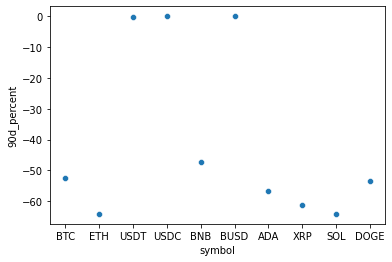

In [43]:
#Visualize 90day drop in the crypto market in top 10 cryptos
df2 = df1[:10]
top_ten = sns.scatterplot(x=df2['symbol'], y=df2['90d_percent'], data=df2)


## All of the top cryptos have dropped more than -40 % in the past 90 days. Stable coins have stuck to their dollar peg for the most part.

### Save dataframe to a csv

In [44]:
df1.to_csv('CoinMarketCap_API_PULL.csv')